# Überwachtes Lernen
Bestimmung einer Funktion zur Vorhersage von Merkmalen (Nominal/Ordinal/Kardinal) unter Verwendung von vollständigen Trainingsdaten (training-set). Nach ihrer Bestimmung wird die Funktion anhand weiterer Daten getestet (testing-set).

### Klassifizierung
Alle vor dem Lernprozess verfügbaren Daten liegen kategorisiert vor. Jeder Datenpunkt besteht aus Merkmalen (Kovariablen) und einer zugeordneten Kategorie. Ziel der Klassifizierung ist eine Funktion abzuleiten, welche neue Daten der gegebenen Menge von Kategorien zuordnet. Die zur Bestimmung der Funktion verwendeten Trainingsdaten bestehen je aus einem Eingangsvektor und dem gewünschten Rückgabewert (Überwachungssignal). Eine weitere Generalisierung hat zum Ziel vollständig unbekannte Datenpunkte einer passenden Kategorie zuzuordnen. 

### Regression
Anstelle den Daten zugeordnete Kategorien liegen kontinuierliche Ausgangsgrößen (abhängige Variablen) vor. Ziel ist die Erstellung einer Schätzfunktion mit kontinuierlichem Wertebereich. 

# Lineare Modelle
Umfassen Methoden zur Datenmodellierung mittels linearer Regression. Der vorhergesagte Zielwert $y$ (target) wird durch eine Linearkombination aller gegebenen Merkmale (features) berechnet:

$$y(w,x)=w_{0}+w_{1}x_{1}+...+w_{n}x_{n}$$

Vektor $\vec{x}=(x_{1},..,x_{n})$ enthält die Merkmalswerte und Vektor $\vec{w}=(w_{0},w_{1},..,w_{n})$ enthält die Regressionskoeffizienten. Die Schätzung der Regressionskoeffizienten setzt die Unabhängigkeit aller Merkmale in $\vec{x}$ voraus. Ist diese Voraussetzung nicht erfüllt, ist eine hohe Modellvarianz die Folge (Schon durch kleine Schwankungen der Zielwerte, z.B. durch zufällige Fehler, entstehen große Abweichungen innerhalb der Regressionskoeffizienten.)

Das Beispiel im folgenden Bild enthält beobachtete Punkte und ihre Approximation mit einem linearen Modell. Die Approximation erfolgt durch die Minimierung der RSS (residual sum of sqaures) zwischen den vorhandenen Daten und den vorhergesagten Daten. (Klasse: sklearn.linear_model.LinearRegression) 
<img src="Lineares_Modell.png" style="width: 400px; height: 300px">

### Polynomiale Regression nichtlinearer Daten
Lineare Modelle (Schätzer) lassen sich durch polynomiale Regression auch auf nichtlineare Abbildungen von Daten anwenden. Dabei wird der Merkmalbereich um  interagierende oder potenzierte Merkmale erweitert, denen jeweils ein neuer linearer Regressionskoeffizient zugeordnet wird.

Ein ebenes lineares Modell könnte folgendermaßen aussehen:

$$y(w,x)=w_{0}+w_{1}x_{1}+w_{2}x_{2}$$

Durch eine entsprechende lineare Modellerweiterung (Transformierung) nimmt das Modell die Form eines Paraboloids an:

$$y(w,x)=w_{0}+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{1}x_{2}+w_{4}x_{1}^{2}+w_{5}x_{2}^{2}$$

Eine Neubenennung der Merkmale verdeutlicht, dass sich dieses Modell mit den Methoden der linearen Modellierung an die Trainingsdaten anpassen lässt:

$$y(w,x)=w_{0}+w_{1}z_{1}+w_{2}z_{2}+w_{3}z_{3}+w_{4}z_{4}+w_{5}z_{5},$$

mit$$\vec{z}=(x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2}).$$

Im folgenden Bild ist die polynomiale Regression eindimensionaler Daten in Abhängigkeit des Erweiterungsgrades dargestellt. 
(Klassen: sklearn.preprocessing.PolynomialFeatures und sklearn.linear_model.LinearRegression) 
<img src="Polynomiale_Modelle.png" style="width: 400px; height: 300px">

***
### Einfluss des Grades der polynomialen Regression auf die lineare Modellierung
Zur Verdeutlichung des Einflusses, welchen polynomial erzeugte Merkmale und ihr höchster Grad auf ein berechnetes Modell haben, wird zunächst einmal eine nichtpolynomiale lineare Regression von sinusförmig verteilten Daten durchgeführt.

Zu Beginn werden die der Modellierung zugrunde liegenden Daten erzeugt. Das Merkmal X enthält zufällige Punkte (samples) zwischen $0$ und $2\pi$. Die abhängige Variable Y erhält man durch die Anwendung der Sinusfunktion auf die Definitionsmenge. Die erzeugten Daten sind somit unsortiert, aber haben eine feste Reihenfolge.

In [6]:
import numpy as np
import random
X = [random.random()*2*np.pi for i in range(50)]
Y_sin = [np.sin(element) for element in X]
for i in range(40,50): #Es werden zur Veranschaulichung 10 Datenpunkte ausgegeben
    print('X{0:<3} {1:<10.2f} Y{0:<3} {2:>5.2f}'.format(i, X[i], Y_sin[i]))

X40  0.63       Y40   0.59
X41  2.80       Y41   0.34
X42  2.17       Y42   0.83
X43  2.09       Y43   0.87
X44  4.87       Y44  -0.99
X45  4.96       Y45  -0.97
X46  5.42       Y46  -0.76
X47  4.03       Y47  -0.77
X48  6.25       Y48  -0.03
X49  2.99       Y49   0.15


Im Plot sehen die Daten folgendermaßen aus:

<function matplotlib.pyplot.show(close=None, block=None)>

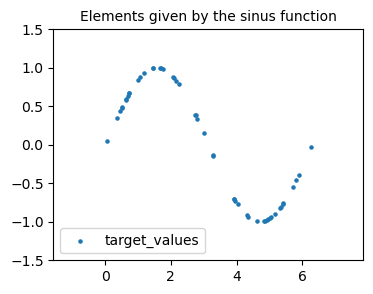

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.title('Elements given by the sinus function', fontsize=10)
plt.xlim([-np.pi/2,np.pi*5/2])
plt.ylim([-1.5,1.5])
plt.scatter(X,Y_sin,label='target_values',s=5)
plt.legend(loc='lower left')
plt.show

Um die Daten zum überwachten Lernen einzusetzen müssen sie zunächst in Trainings- und Testdaten unterteilt und in Matrixform (n_samples $\times$ n_features/n_targets) gebracht werden.

In [8]:
import matplotlib.pyplot as plt
training_features = np.array(X[:-25])[:,np.newaxis] #25 samples/1 feature
testing_features = np.array(X[-25:])[:,np.newaxis]
training_targets = np.array(Y_sin[:-25])[:,np.newaxis]
testing_targets = np.array(Y_sin[-25:])[:,np.newaxis]

Anhand der Trainigsdaten führen wir anschließend eine einfache Regressionsanalyse durch und fertigen ein lineares Modell an. Dafür verwenden wir das Modul "sklearn.linear_model" und erzeugen eine Instanz vom Typ "LinearRegression": 

In [9]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

Das untrainierte Modell kann nun an die Trainingsdaten angepasst werden. Das Resultat ist eine Schätzfunktion mit fixen Regressionskoeffienten und wird "predictor" genannt. 

In [10]:
reg.fit(training_features,training_targets)

print('{string:<25} {n_feat}'.format(string = 'Anzahl der Merkmale', n_feat = reg.n_features_in_))
print('{string:<25} {coef}'.format(string = 'Koeffizienten', coef = reg.coef_))
print('{string:<25} {inter}'.format(string = 'Achsenabschnitt', inter = reg.intercept_))

Anzahl der Merkmale       1
Koeffizienten             [[-0.40898575]]
Achsenabschnitt           [1.20162757]


Mit dem trainierten Modell können nun anhand der Testdaten Vorhersagen gemacht werden, welche mit den wahren Zielwerten (testing_targets) verglichen werden können. Zur Einschätzung der Vorhersagekraft werden die Ergebnisse geplottet und die mittlere quadratische Abweichung (MSE, kleiner ist besser) zwischen den vorhergesagten Zielwerten und den wahren Zielwerten sowie das Bestimmtheitsmaß $R^2$ (1 ist optimal) berechnet.

MSE                       0.28
R2                        0.44


<function matplotlib.pyplot.show(close=None, block=None)>

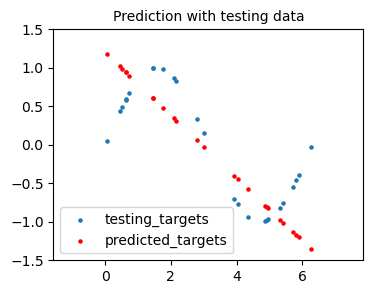

In [11]:
from sklearn.metrics import mean_squared_error as MSE, r2_score as r2

predicted_targets = reg.predict(testing_features)

print('{string:<25} {MSE:.2f}'.format(string = 'MSE', MSE = MSE(testing_targets, predicted_targets)))
print('{string:<25} {R2:.2f}'.format(string = 'R2', R2 = r2(testing_targets, predicted_targets)))
plt.figure(figsize=(4,3))
plt.title('Prediction with testing data', fontsize=10)
plt.xlim([-np.pi/2,np.pi*5/2])
plt.ylim([-1.5,1.5])
plt.scatter(testing_features,testing_targets,label='testing_targets',s=5)
plt.scatter(testing_features,predicted_targets,label='predicted_targets',color='red',s=5)
plt.legend(loc='lower left')
plt.show

Die Vorhersagekraft des nichtpolynomial erzeugten Modells ist nicht hoch. Um die Vorhersagekraft zu optimieren werden im Folgenden polynome Merkmale mittels eines Transformators ergänzt und die Fähigkeit zur Schätzung der Zielwerte in Abhängigkeit vom Erweiterungsgrad überwacht.
***
Der Transformator erzeugt mit den Daten der vorherigen Trainingsmatrix eine neue Trainingsmatrix, welche zusätzlich zu den alten Merkmalen neu errechnete Merkmale höheren Grades enthält. Der höchste Grad wird im Vorfeld bei der Instanziierung des neuen Transformationsobjekts definiert (es ist aber auch möglich ausschließlich Interaktionen der Merkmale zu berücksichtigen). 

Mit den neuen Trainingsdaten kann anschließend ein einfaches lineares Modell mit einer linearen Regression an die Trainingsdaten angepasst werden. 

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2, include_bias=False) #Erzeugen des Transformators
poly2.fit(training_features) 
poly2_training_features = poly2.transform(training_features) 
poly2_testing_features = poly2.transform(testing_features) 

print('{string:<25} {n_feat}'.format(string = 'Merkmale vorher', n_feat = poly2.n_features_in_))
print('{string:<25} {n_feat}\n'.format(string = 'Merkmale nachher', n_feat = poly2.n_output_features_))
print(poly2_training_features[-10:,:]) #Es werden zur Veranschaulichung 10 Datenpunkte ausgegeben

Merkmale vorher           1
Merkmale nachher          2

[[ 5.4118263  29.28786388]
 [ 1.01112771  1.02237924]
 [ 2.74116478  7.51398433]
 [ 5.05269202 25.52969668]
 [ 1.06511037  1.1344601 ]
 [ 3.9146123  15.32418947]
 [ 4.61475914 21.29600196]
 [ 4.84440051 23.46821634]
 [ 3.27606544 10.73260477]
 [ 1.68061261  2.82445874]]


Nun kann wie bereits oben vorgeführt eine neue lineare Regression anhand der gewonnenen polynomen Traningsdaten durchgeführt werden. Anschließend benutzen wir das neue Modell um Vorhersagen zu machen und diese mit den ebenfalls polynomisierten Testdaten zu vergleichen. 

Anzahl Regr. Merkmale     2
Regr. Koeffizienten       [[ 0.00461515 -0.07063363]]
Achsenabschnitt           [0.80342163]

MSE                       0.38
R2                        0.25


<function matplotlib.pyplot.show(close=None, block=None)>

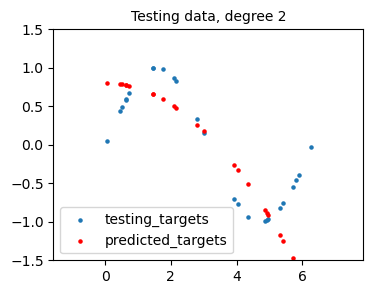

In [13]:
#Training
poly2_reg = linear_model.LinearRegression()
poly2_reg.fit(poly2_training_features,training_targets)

print('{string:<25} {n_feat}'.format(string = 'Anzahl Regr. Merkmale', n_feat = poly2_reg.n_features_in_))
print('{string:<25} {coef}'.format(string = 'Regr. Koeffizienten', coef = poly2_reg.coef_))
print('{string:<25} {inter}\n'.format(string = 'Achsenabschnitt', inter = poly2_reg.intercept_))

#Vorhersage und Überprüfung
predicted_targets = poly2_reg.predict(poly2_testing_features)

print('{string:<25} {MSE:.2f}'.format(string = 'MSE', MSE = MSE(testing_targets, predicted_targets)))
print('{string:<25} {R2:.2f}'.format(string = 'R2', R2 = r2(testing_targets, predicted_targets)))
plt.figure(figsize=(4,3))
plt.title('Testing data, degree 2', fontsize=10)
plt.xlim([-np.pi/2,np.pi*5/2])
plt.ylim([-1.5,1.5])
plt.scatter(testing_features,testing_targets,label='testing_targets',s=5)
plt.scatter(testing_features,predicted_targets,label='predicted_targets',color='red',s=5)
plt.legend(loc='lower left')
plt.show

Das angepasste Modell mit Grad 2 hat nun einen quadratischen Verlauf, schneidet aber bei der Validierung mit den Testdaten nicht in jedem Fall besser ab (Erkennbar an der Anpassungsgüte). Das liegt daran, dass das Modell ausschließlich auf den Trainingsdaten beruht.
***
Eine Vorhersage mit den Trainingsdaten selbst ist auch möglich. Auch diese Vorhersage lässt sich bewerten. 

MSE                       0.08
R2                        0.86


<function matplotlib.pyplot.show(close=None, block=None)>

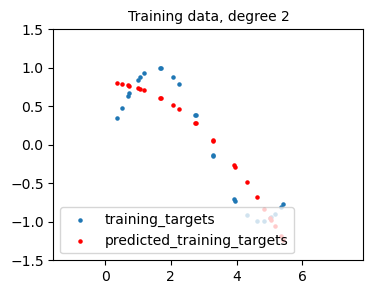

In [14]:
#Vorhersage und Überprüfung
predicted_training_targets = poly2_reg.predict(poly2_training_features)

print('{string:<25} {MSE:.2f}'.format(string = 'MSE', MSE = MSE(training_targets, predicted_training_targets)))
print('{string:<25} {R2:.2f}'.format(string = 'R2', R2 = r2(training_targets, predicted_training_targets)))
plt.figure(figsize=(4,3))
plt.title('Training data, degree 2', fontsize=10)
plt.xlim([-np.pi/2,np.pi*5/2])
plt.ylim([-1.5,1.5])
plt.scatter(training_features,training_targets,label='training_targets',s=5)
plt.scatter(training_features,predicted_training_targets,label='predicted_training_targets',color='red',s=5)
plt.legend(loc='lower left')
plt.show

***
Mittels einer selbst erstellten Funktion, welche alle oben genannten Schritte mit einbezieht, lässt sich dieser Prozess einfacher Visualisieren. 

Anhand der Trainingsdsaten wird, genau wie oben bereits dargestellt, erst eine Polynomisierung und anschließend eine lineare Regression mit dem erweiterten Merkmalsbereich durchgeführt. Die Auswertung der Vorhersagegüte erfolgt auf Basis der übrigen Testdaten. Darüber hinaus wird das vollständige Modell und sein Grad ausgegeben.

Wir wiederholen die vorangegangenen Schritte in einem kurzen Schritt. 

In [15]:
%load_ext autoreload
%autoreload 2

Anzahl Regr. Merkmale     2
Regr. Koeffizienten       [[ 0.00461515 -0.07063363]]
Achsenabschnitt Regr.     [0.80342163]
MSE                       0.38
R2                        0.25



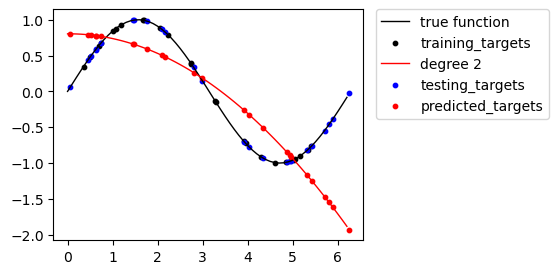

In [16]:
from polypredictmodule import polypredict
fig, ax = plt.subplots(figsize=(4,3))
plot = polypredict(ax, np.sin, samples_X=X, samples_Y=Y_sin, degree=2, show_predicted_targets=True) #Auswertung der Sinus-Funktion

Dargestellt sind die zu schätzende Funktion mit den Zielwerten der Trainings- und Testdaten und die Schätzfunktion.
***
Durch die Erhöhung des Grades erhöhen wir die Anpassung an die Trainingsdaten. 

Im Folgenden wird zu allen Daten eine normalverteilte Streuung ergänzt, wie sie auch bei real gemessenen Daten auftritt.

Anzahl Regr. Merkmale     3
Regr. Koeffizienten       [[ 2.31402566 -1.03314291  0.11022782]]
Achsenabschnitt Regr.     [-0.5027262]
MSE                       0.02
R2                        0.95



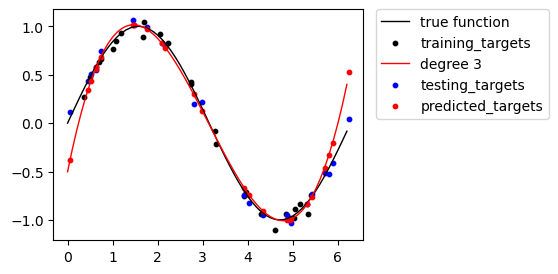

In [17]:
Y_sin_rand = [element+(0.3*abs(max(Y_sin, key=abs))*np.random.normal(0, 0.2)) for element in Y_sin]
fig, ax = plt.subplots(figsize=(4,3))
plot = polypredict(ax, np.sin, samples_X=X, samples_Y=Y_sin_rand, degree=3, show_predicted_targets=True) #Auswertung der Sinus-Funktion

Die Anpassungsgüte ist mit Polynomgrad 3 bereits sehr hoch. Dies wird durch den MSE und $R^2$ Wert bestätigt. Eine weitere Erhöhung des Grades optimiert die Anpassung an die Trainingsdaten immer weiter. Mit Grad 5 ergibt sich mit den gleichen Daten folgende Modellierung:

In [4]:
import matplotlib.pyplot as plt
from polypredictmodule import polypredict

Anzahl Regr. Merkmale     5
Regr. Koeffizienten       [[ 0.47609495  0.72679629 -0.59355131  0.12419028 -0.00800833]]
Achsenabschnitt Regr.     [0.08687462]
MSE                       0.01
R2                        0.98



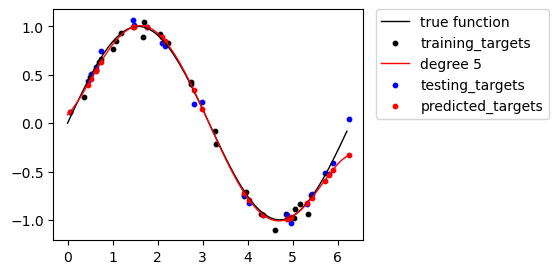

In [18]:
fig, ax = plt.subplots(figsize=(4,3))
plot = polypredict(ax, np.sin, samples_X=X, samples_Y=Y_sin_rand, degree=5, show_predicted_targets=True) #Auswertung der Sinus-Funktion

### Overfitting und Underfitting
Welche Auswirkung der Polynomgrad auf die Modellierung und die Vorhersagegüte hat, wird im Folgenden Beispiel gezeigt.

Anstelle der Sinus-Funktion können auch andere Funktionen modelliert werden. Zum Beispiel ein beliebiges Polynom.

In [ ]:
def polynomial(x):
    P = [1, -5, -3, 2, 1] #Absteigende Liste von Koeffizienten für ein Polynom mit Grad len(P)-1
    y = np.polyval(P,x)
    return y

Mit dem Polynom werden zuerst neue Trainings- und Testdaten erzeugt. Anschließend werden Schätzfunktionen mit unterschiedlichem Grad bestimmt. 

In [346]:
X2 = [random.random()*2*np.pi for i in range(50)] #Erzeugen neuer Daten
Y2_poly= [polynomial(element) for element in X2]
Y2_poly_rand = [element+(0.3*abs(max(Y2_poly, key=abs))*np.random.normal(0, 0.2)) for element in Y2_poly]

Anzahl Regr. Merkmale     2
Regr. Koeffizienten       [[-129.06497158   21.04098069]]
Achsenabschnitt Regr.     [105.42287188]
MSE                       1900.90
R2                        0.17

Anzahl Regr. Merkmale     6
Regr. Koeffizienten       [[ 1.39074370e+02 -1.84226812e+02  9.65951416e+01 -2.64781049e+01
   3.55344602e+00 -1.76594777e-01]]
Achsenabschnitt Regr.     [-25.06544248]
MSE                       164.84
R2                        0.93

Anzahl Regr. Merkmale     30
Regr. Koeffizienten       [[ 2.49229092e-09 -1.69209328e-11  8.36503981e-15 -1.68487485e-13
  -5.40605271e-13 -1.69790432e-12 -5.22745036e-12 -1.57733494e-11
  -4.65645965e-11 -1.34099699e-10 -3.75250038e-10 -1.01508770e-09
  -2.63696533e-09 -6.52202926e-09 -1.51824670e-08 -3.27379696e-08
  -6.38784007e-08 -1.08667197e-07 -1.50633189e-07 -1.45044071e-07
  -4.13209138e-08  1.13604886e-07  9.10324414e-08 -1.48343098e-07
   7.65055124e-08 -2.12960919e-08  3.55883232e-09 -3.58921723e-10
   2.02375701e-11 -4.9180893

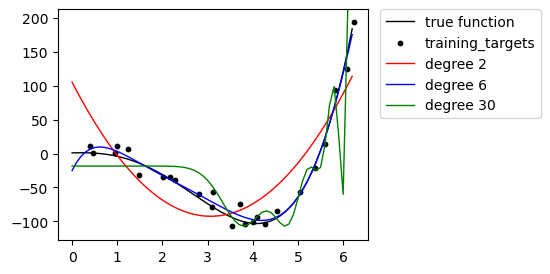

In [348]:
fig, ax = plt.subplots(figsize=(4,3))
ax.set_ylim(min(Y2_poly_rand)*1.1,max(Y2_poly_rand)*1.1)
plot = polypredict(ax, polynomial, samples_X=X2, samples_Y=Y2_poly_rand, degree=2) 
for i in [6,30]:
    plot = polypredict(ax, polynomial, samples_X=X2, samples_Y=Y2_poly_rand, degree=i, figure=fig, show_given_function=False) 

Es zeigt sich, dass eine Vergrößerung des Polynomgrades nur bis zu einem bestimmten Wert Sinn macht. Ein Optimum scheint bei Grad 6 zu liegen. Bei Grad 30 ist die Vorhersagekraft für Bereiche zwischen den Traningspunkten deutlich verschlechtert. Diese Beobachtungen werden durch den MSE-Wert und dem Maß für die Anpassungsgüte $R^2$ bestätigt.

Dieses Verhalten wird "Overfitting" genannt. 

Im Allgemeinen steigt mit Erhöhung des Grades die Anpassung an die Trainingsdaten, aber die Vorhersagekraft für die Testdaten fällt mit steigendem Grad irgendwann wieder ab. 

Um das zu verdeutlichen werden im Folgenden sowohl auf Basis von Trainingsdaten als auch auf Grundlage von Testdaten Vorhersagen gemacht. Die Auswertung erfolgt mit dem MSE-Wert und der Anpassungsgüte $R^2$.

In [397]:
X3 = [random.random()*2*np.pi for i in range(50)]
Y3_poly= [polynomial(element) for element in X3]
Y3_poly_rand = [element+(0.3*abs(max(Y3_poly, key=abs))*np.random.normal(0, 0.2)) for element in Y3_poly]

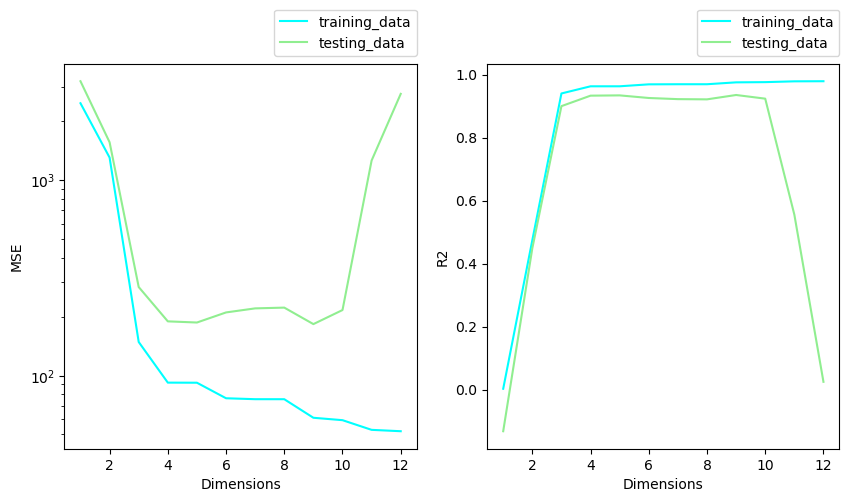

In [400]:
from polypredictmodule import R2MSEeval
R2MSEeval(maximum_degree=12, samples_X=X3, samples_Y=Y3_poly_rand)

Wie der MSE Wert und die Anpassungsgüte $R^2$ zeigen, wird der Anpassungsfehler bei den Trainingsdaten mit steigendem Grad immer kleiner, aber die Vorhersagekraft bei den Testdaten nimmt mit steigendem Grad irgendwann wieder ab. 

### Bias vs. Variance

Im letzten Beispiel sieht man sehr gut, dass mit steigender Modellkomplexität die Anpassung an das Modell optimaler wird (kleinerer Bias), aber im Gegensatz dazu die Vorhersagekraft stark abnimmt (höhere Modellvarianz). Bei zu geringer Komplexität ist die Anpassung des Modells an die Trainingsdaten schlecht, woraus auch eine schlechte Vorhersagekraft resultiert. Es gilt daher ein ausgewogenes Maß bei der Annäherung an die Trainingsdaten während der Modellierung zu finden.

<img src="Bias Variance Trade Off.jpg">

### Lasso
Das Lasso ist ein lineares Modell, das Koeffizienten schätzt und dabei die Tendenz hat insgesamt weniger Koeffizienten zu verwenden. Dadurch wird die Anzahl abhängiger Merkmale reduziert. Die Formel zur Fehlerminimierung zur Bestimmung der Koeffizienten umfasst einen weiteren angehängten Term. Die Höhe von Alpha bestimmt wie schnell Koeffizienten vernachlässigt werden. 

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

Die Schwierigkeit besteht darin Alpha so zu optimieren, dass das Modell die zugrunde liegenden Daten mit optimalem "Grad der Generalisierung" und Varianz wiedergibt.
Als Kriterium kommen der resultierende MSE-Wert (mean squared error) oder sogenannte Informationskriterien wie das Akaike information criterion (AIC) oder das Bayes information criterion (BIC) in Frage. 

Im Folgenden Beispiel wird Alpha anhand des MSE-Werts optimiert. Mit definierten Werten von Alpha werden Modelle bestimmt. Das beste Modell wird mit k-facher Cross-Validierung ausgewählt.

In [7]:
from sklearn.datasets import load_diabetes #Laden von Beispieldaten
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [53]:
number_of_cross_validations = 5
alpha_values = [0.01, 0.02, 0.03, 0.05, 0.07, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
reg = LassoCV(alphas=alpha_values,cv=number_of_cross_validations, random_state=0).fit(X_train, y_train)
print('gewähltes Alpha   '+str(reg.alpha_))
print('R2 Trainingsdaten '+str(reg.score(X_train, y_train)))
print('R2 Testdaten      '+str(reg.score(X_test, y_test)))

gewähltes Alpha   0.07
R2 Trainingsdaten 0.5744989699317815
R2 Testdaten      0.3975768673376905


In [54]:
print(reg.coef_)

[ -27.08186954 -179.13015502  554.91984537  309.16537267 -178.22477583
   -0.         -210.2752628     0.          610.20198857   13.20963667]


### K-fache Cross-Validierung

Um Overfitting zu vermeiden gibt es die Strategie der Cross-Validierung. Damit soll eine möglichst hohe Generalisierung sichergestellt werden. Jede Art von Wissen über die Daten kann schon bei der Selektion von sogenannten "Hyperparametern" (externe Konfigurationsvariablen) die Modellierung beeinflussen. Um diesen Effekt zu minimiern wird das Trainings-Set unterteilt und ein Validierungs-Set erzeugt. Mit dem Validierungs-Set erfolgt eine Vorbewertung des Modells und somit der Hyperparameter. Nach der Modellierung wird das Modell wie gehabt mit den Test-Daten überprüft. 

Durch die weitere Unterteilung senkt sich aber wiederum die Anzahl der verfügbaren Stichproben und das Modell könnte an Aussagekraft verlieren. Die Auswahl der Daten hätte einen zufälligen Einfluss auf das Modell. 

Bei der k-fachen Cross-Validierung wird dieses Problem umgangen, indem die Trainingsdaten in k kleinere Datensätze unterteilt werden. Anschließend werden k Schritte durchlaufen, welche immer den gleichen Ablauf haben: Ein Modell wird anhand von k-1 Trainingdatensätzen erstellt und mit dem übrigen Datensatz validiert (seine Performance bestimmt). Der Durchschnitt aller k Validierungen ergibt die Gesamtperformance. 

<img src="k-fache Cross Validierung.png">